In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029655308E20>,
      dtype=object)

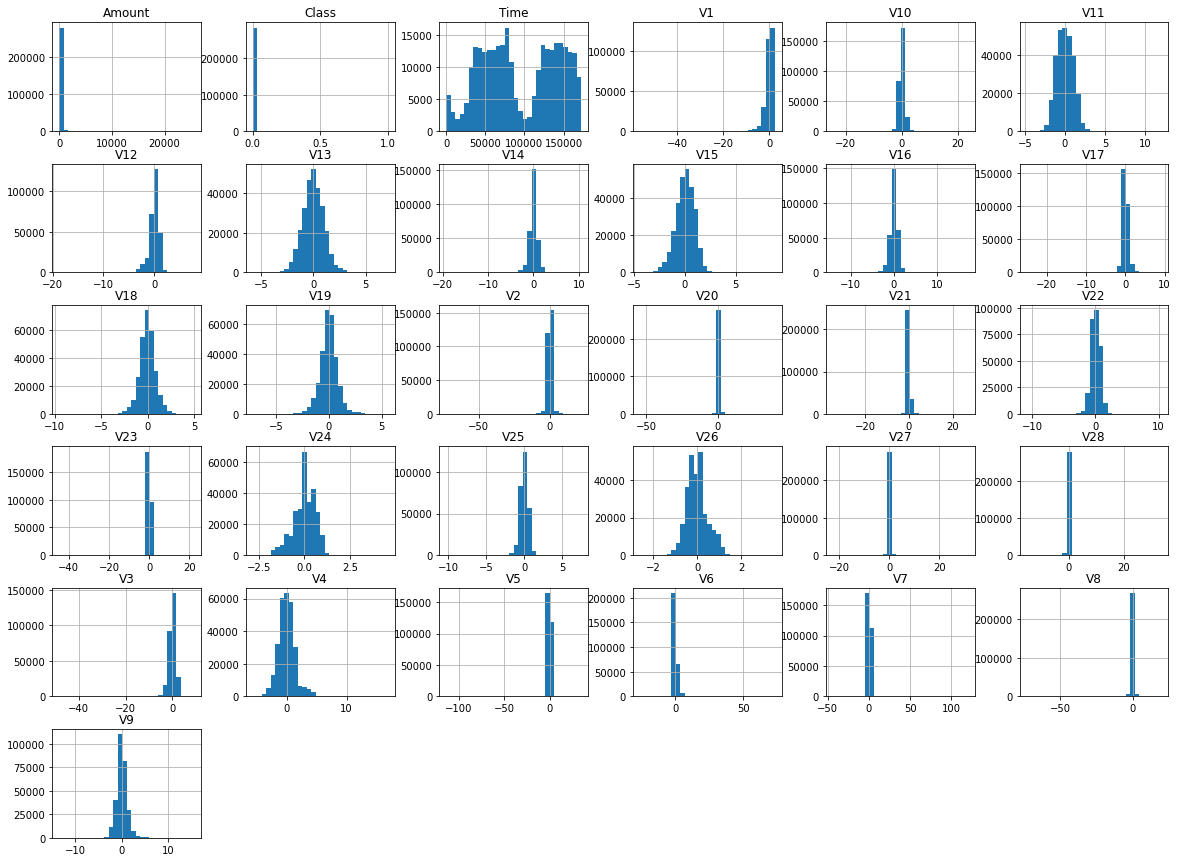

In [5]:
df.hist(figsize=(20,15), bins=30)

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
df['Class'].value_counts(normalize=True) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [8]:
df2 = df.loc[df['Class']==0].sample(n=492).copy()
df3 = df.loc[df['Class']==1].copy()
df4 = pd.concat([df2,df3], ignore_index=True)

df4 = df4.sample(frac=1)

df4.reset_index(drop=True, inplace=True)
df4

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,26556.0,-19.179826,11.817922,-21.919174,6.086236,-14.708845,-4.308888,-15.357952,12.857165,-3.999861,...,1.746802,-1.353149,-0.762965,0.117028,1.297994,-0.224825,1.621052,0.484614,99.99,1
1,28242.0,-2.787248,-0.071340,-1.505288,3.361777,-3.357422,0.565835,0.303653,0.966914,-2.245882,...,0.882940,-0.246202,1.752227,0.219925,0.156282,-0.265894,0.220694,0.256077,730.86,1
2,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
3,29753.0,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,...,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,0.68,1
4,42474.0,-3.843009,3.375110,-5.492893,6.136378,2.797195,-2.646162,-1.668931,-2.617552,-3.945843,...,-1.277812,0.719652,0.451125,-0.258094,0.656129,0.556676,0.739383,-0.203050,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,138216.0,-0.274452,1.223102,-0.387231,-0.439204,0.302988,-1.023266,0.662888,0.218705,-0.563955,...,0.476983,1.522605,-0.094183,0.137716,-0.784374,-0.245459,0.387186,0.251712,0.89,0
980,168051.0,-4.423731,-2.663975,0.332532,2.170554,2.464846,-2.023425,-1.265979,0.100331,0.042844,...,-0.174418,0.083801,-2.746290,0.154934,0.498099,-0.190594,0.573961,-1.116584,4.99,0
981,21662.0,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.00,1
982,93853.0,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,...,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,316.06,1


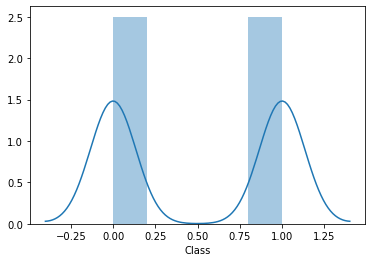

In [16]:
sns.distplot(df4['Class'])

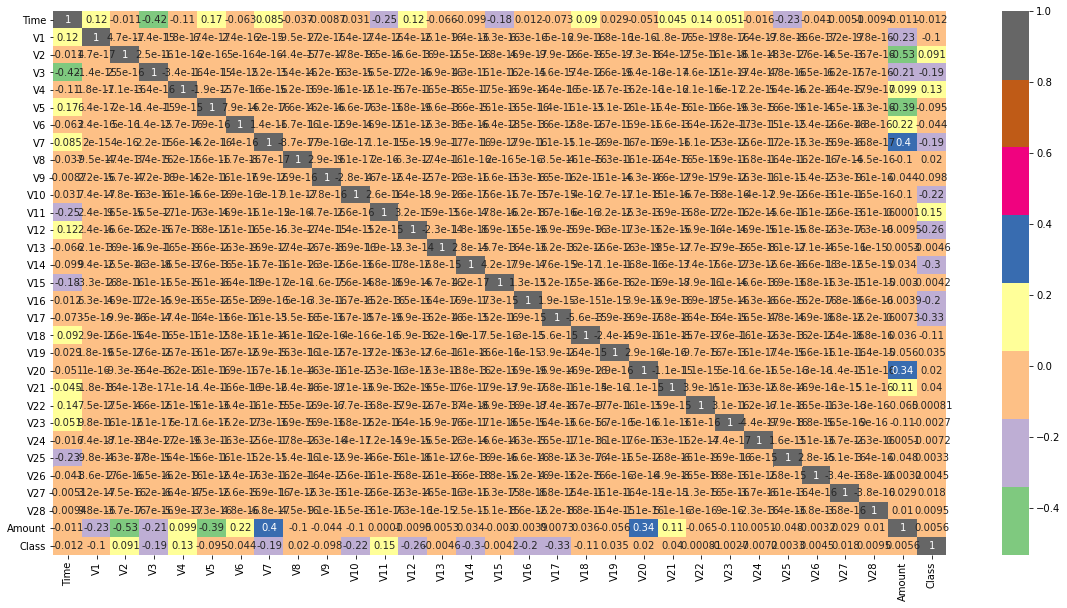

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='Accent')

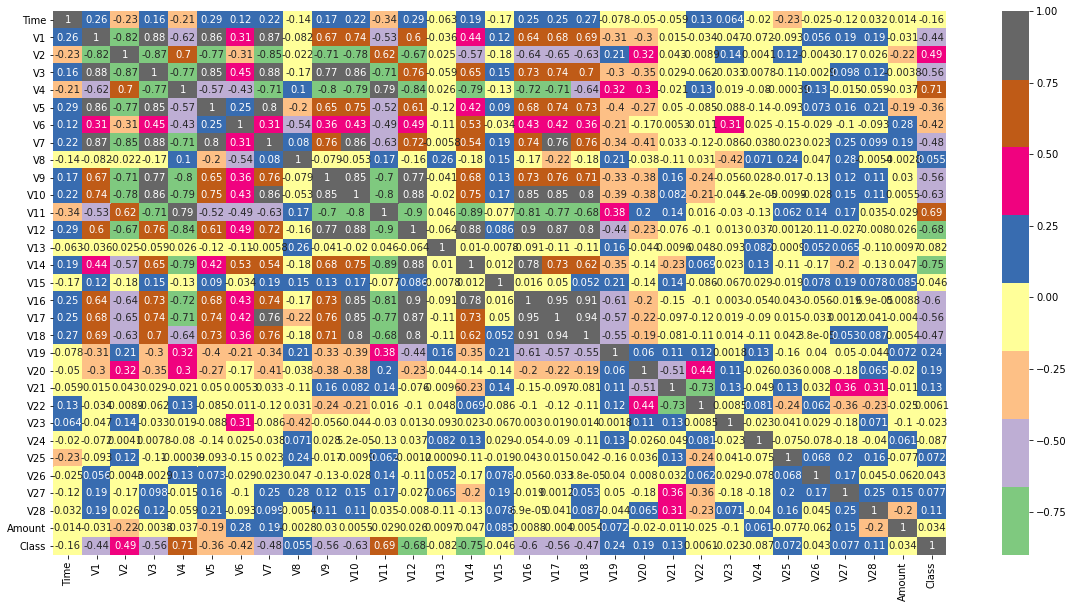

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df4.corr(), annot=True, cmap='Accent')

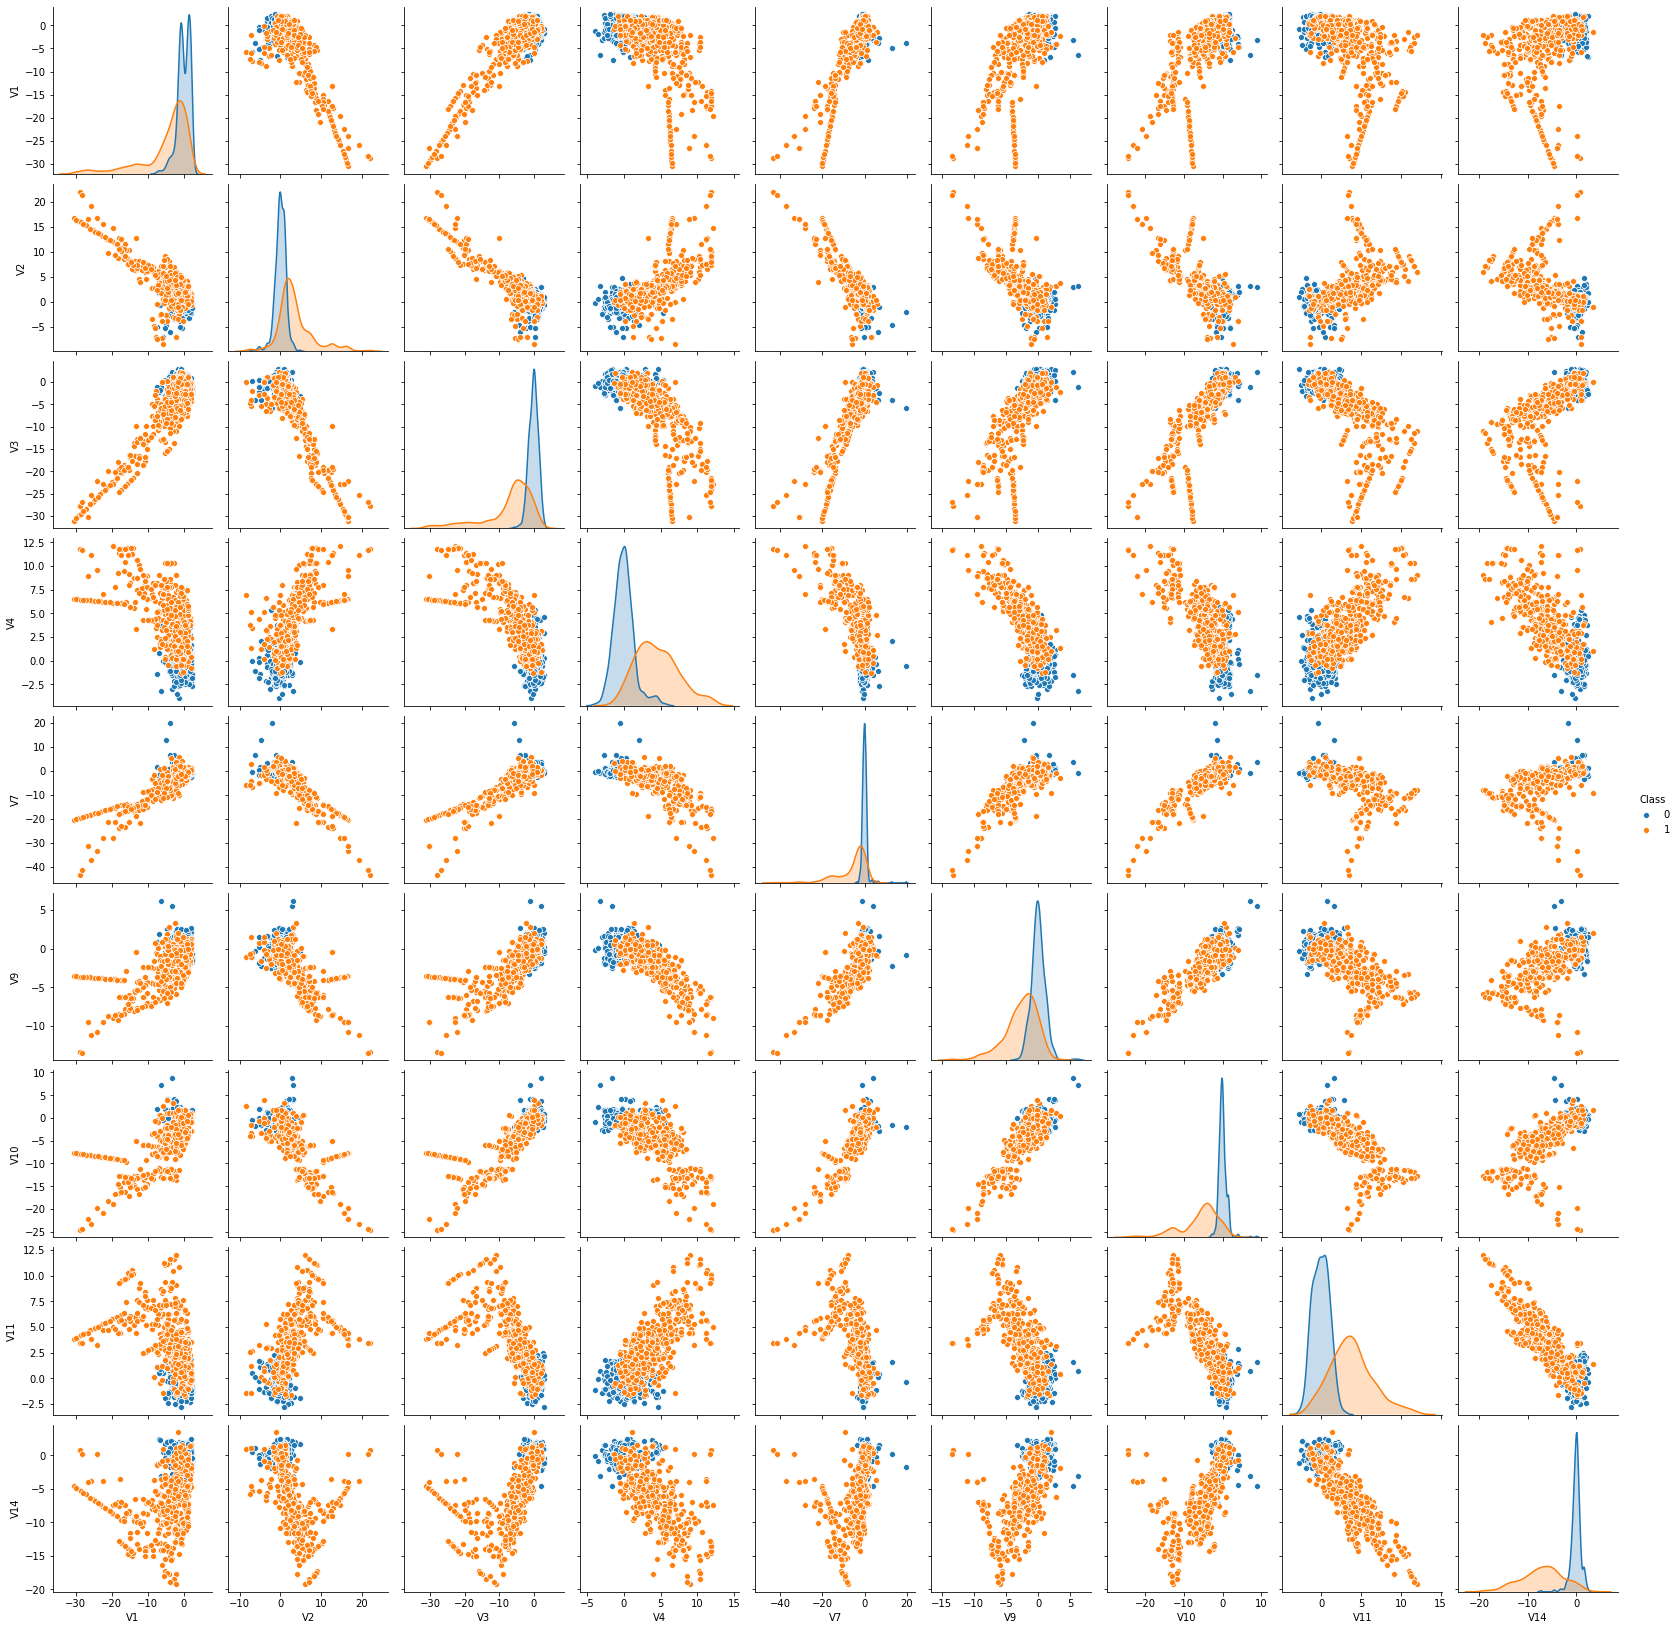

In [17]:
sns.pairplot(df4[['V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V14', 'Class']], hue='Class')

In [18]:
df4.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [19]:
X = df4[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

sel = VarianceThreshold(threshold=(.8))
sel.fit_transform(X)

array([[ 2.65560000e+04, -1.91798264e+01,  1.18179220e+01, ...,
        -7.62965073e-01,  1.62105239e+00,  9.99900000e+01],
       [ 2.82420000e+04, -2.78724793e+00, -7.13403777e-02, ...,
         1.75222678e+00,  2.20694023e-01,  7.30860000e+02],
       [ 7.53500000e+03,  2.67792264e-02,  4.13246390e+00, ...,
        -6.69605372e-01,  7.37040382e-01,  1.00000000e+00],
       ...,
       [ 2.16620000e+04, -1.80185612e+01,  1.05586002e+01, ...,
         1.35290371e+00,  2.07808058e+00,  1.00000000e+00],
       [ 9.38530000e+04, -5.83919162e+00,  7.15153235e+00, ...,
         5.30480596e-01,  1.04886020e-01,  3.16060000e+02],
       [ 1.22348000e+05, -6.60361022e-01,  1.21626252e+00, ...,
         5.68781954e-01,  3.29852155e-01,  4.80000000e+00]])

In [20]:
X = sel.fit_transform(X)
X[0]

array([ 2.65560000e+04, -1.91798264e+01,  1.18179220e+01, -2.19191736e+01,
        6.08623563e+00, -1.47088448e+01, -4.30888761e+00, -1.53579518e+01,
        1.28571650e+01, -3.99986077e+00, -8.92865566e+00,  5.84929307e+00,
       -8.26164984e+00,  1.53829148e-01, -8.82935923e+00,  8.87883883e-03,
       -7.07095301e+00, -1.36297209e+01, -4.95882982e+00,  1.27209136e+00,
        1.57294961e+00,  1.74680154e+00, -1.35314877e+00, -7.62965073e-01,
        1.62105239e+00,  9.99900000e+01])

In [21]:
y = df4['Class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.02, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfc.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.02)

---Train Data---
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       343
           1       0.98      0.87      0.92       345

    accuracy                           0.93       688
   macro avg       0.93      0.93      0.93       688
weighted avg       0.93      0.93      0.93       688

---Test Data---
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       149
           1       0.99      0.90      0.95       147

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



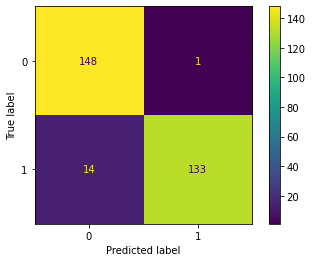

In [24]:
print('---Train Data---')
print(classification_report(y_train, y_pred=(rfc.predict(X_train))))
print("---Test Data---")
print(classification_report(y_test, y_pred=(rfc.predict(X_test))))
plot_confusion_matrix(rfc, X_test, y_test)

In [25]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

---Train Data---
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       343
           1       0.94      0.87      0.90       345

    accuracy                           0.91       688
   macro avg       0.91      0.91      0.91       688
weighted avg       0.91      0.91      0.91       688

---Test Data---
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       149
           1       0.99      0.90      0.94       147

    accuracy                           0.94       296
   macro avg       0.95      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296



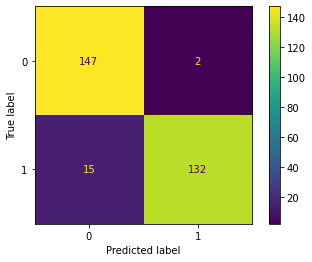

In [26]:
print('---Train Data---')
print(classification_report(y_train, y_pred=(lr.predict(X_train))))
print("---Test Data---")
print(classification_report(y_test, y_pred=(lr.predict(X_test))))
plot_confusion_matrix(lr, X_test, y_test)

In [27]:
p1 = rfc.predict_proba(X_test)
p2 = lr.predict_proba(X_test)

In [28]:
auc_score1 = roc_auc_score(y_test, p1[:,1])
auc_score2 = roc_auc_score(y_test, p2[:,1])
print(auc_score1,auc_score2)

0.9725151805688719 0.9691823037940007


In [29]:
fpr1, tpr1, thresh1 = roc_curve(y_test, p1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p2[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

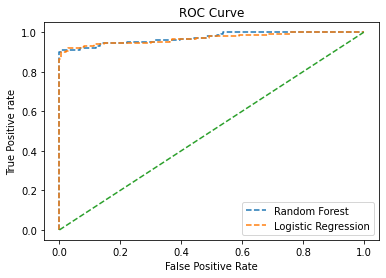

In [30]:
plt.plot(fpr1, tpr1, linestyle='--', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')